**Modified Code for novelty preference analysis. Adapted from socialbility analysis**

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
from pathlib import Path
import glob
import os
import matplotlib.pyplot as plt
import numpy as np





# Calculate mean and SEM for social agent and empty cup
avg_social_agent = soc['social_agent'].mean()
avg_empty_cup = soc['empty_cup'].mean()
sem_social_agent = soc['social_agent'].sem()
sem_empty_cup = soc['empty_cup'].sem()

plot_bar_with_sem(['Social Agent', 'Empty Cup'], [avg_social_agent, avg_empty_cup], [sem_social_agent, sem_empty_cup], 'Comparison of Social Agent vs. Empty Cup Investigation Time')

# Filter data based on Animal notes column
cagemates = soc[soc['Animal notes'] == 'Cagemate']
familiar = soc[soc['Animal notes'] == 'Familiar']

# Perform t-tests comparing cagemate vs. empty and familiar vs. empty
t_stat_cagemate, p_value_cagemate = ttest_ind(cagemates['social_agent'], cagemates['empty_cup'])
t_stat_familiar, p_value_familiar = ttest_ind(familiar['social_agent'], familiar['empty_cup'])

# Print the results
print("Cagemate vs. Empty:")
print("t-statistic:", t_stat_cagemate)
print("p-value:", p_value_cagemate)

print("\nFamiliar vs. Empty:")
print("t-statistic:", t_stat_familiar)
print("p-value:", p_value_familiar)

# Calculate mean and SEM for cagemates and familiar
cagemate_mean = cagemates['social_agent'].mean()
familiar_mean = familiar['social_agent'].mean()
cagemate_sem = cagemates['social_agent'].sem()
familiar_sem = familiar['social_agent'].sem()

plot_bar_with_sem(['Cagemate', 'Empty Cup'], [cagemate_mean, cagemates['empty_cup'].mean()], [cagemate_sem, cagemates['empty_cup'].sem()], 'Comparison of Cagemate vs. Empty Cup Investigation Time')
plot_bar_with_sem(['Familiar', 'Empty Cup'], [familiar_mean, familiar['empty_cup'].mean()], [familiar_sem, familiar['empty_cup'].sem()], 'Comparison of Familiar vs. Empty Cup Investigation Time')


**Novelty Preference Analysis (Anymaze csv file)**

In [65]:
import pandas as pd

# Read the first CSV file
df1 = pd.read_csv(r"D:\Sequioa\anymaze_data\SM\cage_1_SM_day_1_3.csv")

# Read the second CSV file
df2 = pd.read_csv(r"D:\Sequioa\anymaze_data\SM\cage_2_SM_day_2_4.csv")

# Rename columns in the first DataFrame
df1.rename(columns={
    'Novel-Right : time investigating (s)': 'Novel',
    'Familiar-Left : time investigating (s)': 'Social Agent'
}, inplace=True)

# Rename columns in the second DataFrame
df2.rename(columns={
    'Familiar Right : time investigating (s)': 'Social Agent',
    'Novel Left : time investigating (s)': 'Novel'
}, inplace=True)

# Merge the two DataFrames based on the 'Test' column
merged_df = pd.merge(df1, df2, on='Test', suffixes=('_1', '_2'))

# Concatenate the DataFrames along the rows
combined_df = pd.concat([df1, df2], ignore_index=True)

print(combined_df)
combined_df

    Test Animal Animal notes Segment of test  Novel  Social Agent  \
0      1  1.1.1     familiar   0 - 300 secs.   66.3          51.2   
1      2  1.3.1     cagemate   0 - 300 secs.   56.5          28.7   
2      3  1.1.3     cagemate   0 - 300 secs.  134.9           8.2   
3      4  1.2.3     cagemate   0 - 300 secs.   80.1          22.9   
4      5  1.3.3     familiar   0 - 300 secs.   62.9          13.4   
5      6  1.4.1     cagemate   0 - 300 secs.   90.4          13.1   
6      7  1.2.1     familiar   0 - 300 secs.   40.4          34.4   
7      8  1.4.3     familiar   0 - 300 secs.  106.4          22.3   
8      1  2.1.2      cagmate   0 - 300 secs.   48.1          22.0   
9      2  2.4.2     familiar   0 - 300 secs.   24.4          31.5   
10     3  2.1.4     familiar   0 - 300 secs.   46.7          26.2   
11     4  2.2.4     familiar   0 - 300 secs.   82.3          18.1   
12     5  2.3.4      cagmate   0 - 300 secs.   56.8          10.3   
13     6  2.4.4      cagmate   0 -

,Test,Animal,Animal notes,Segment of test,Novel,Social Agent,Whole-Chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s)
0,1,1.1.1,familiar,0 - 300 secs.,66.3,51.2,248.5,83.1,100.6
1,2,1.3.1,cagemate,0 - 300 secs.,56.5,28.7,261.8,119.7,104.8
2,3,1.1.3,cagemate,0 - 300 secs.,134.9,8.2,256.3,27.8,182.5
3,4,1.2.3,cagemate,0 - 300 secs.,80.1,22.9,276.9,55.6,188.2
4,5,1.3.3,familiar,0 - 300 secs.,62.9,13.4,265.3,41.0,173.0
5,6,1.4.1,cagemate,0 - 300 secs.,90.4,13.1,265.9,36.7,176.8
6,7,1.2.1,familiar,0 - 300 secs.,40.4,34.4,261.9,83.8,110.1
7,8,1.4.3,familiar,0 - 300 secs.,106.4,22.3,248.4,44.1,151.2
8,1,2.1.2,cagmate,0 - 300 secs.,48.1,22.0,265.8,101.5,118.4
9,2,2.4.2,familiar,0 - 300 secs.,24.4,31.5,271.6,67.6,122.4


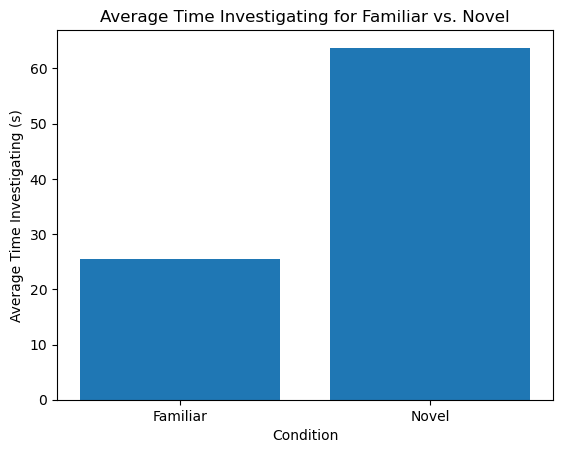

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming combined_df is already defined with the combined data

# Calculate the average time investigating for familiar and novel
avg_familiar = combined_df['Familiar'].mean()
avg_novel = combined_df['Novel'].mean()

# Create a bar plot
plt.bar(['Familiar', 'Novel'], [avg_familiar, avg_novel])

# Add labels and title
plt.xlabel('Condition')
plt.ylabel('Average Time Investigating (s)')
plt.title('Average Time Investigating for Familiar vs. Novel')

# Show the plot
plt.show()


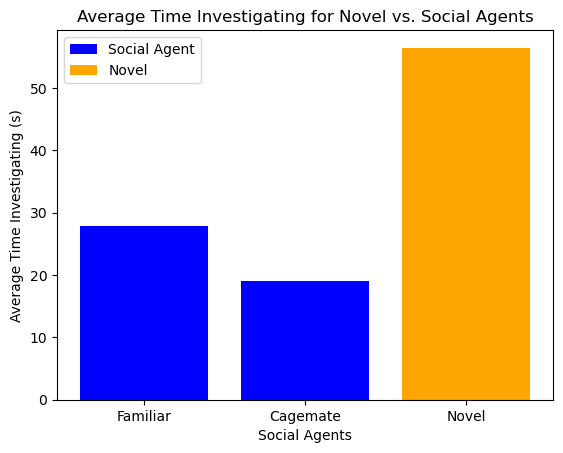

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame
data = {
    'Test': [1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8],
    'Animal': ['1.1.1', '1.3.1', '1.1.3', '1.2.3', '1.3.3', '1.4.1', '1.2.1', '1.4.3', '2.1.2', '2.4.2', '2.1.4', '2.2.4', '2.3.4', '2.4.4', '2.2.2', '2.3.2'],
    'Animal notes': ['familiar', 'cagemate', 'cagemate', 'cagemate', 'familiar', 'cagemate', 'familiar', 'familiar', 'cagemate', 'familiar', 'familiar', 'familiar', 'cagmate', 'cagmate', 'cagmate', 'familiar'],
    'Novel': [66.3, 56.5, 134.9, 80.1, 62.9, 90.4, 40.4, 106.4, 48.1, 24.4, 46.7, 82.3, 56.8, 47.8, 53.5, 22.5],
    'Social Agent': [51.2, 28.7, 8.2, 22.9, 13.4, 13.1, 34.4, 22.3, 22.0, 31.5, 26.2, 18.1, 10.3, 21.2, 59.2, 26.2],
    'Whole-Chamber : time (s)': [248.5, 261.8, 256.3, 276.9, 265.3, 265.9, 261.9, 248.4, 265.8, 271.6, 255.3, 283.0, 265.9, 277.3, 265.9, 256.8],
    'Whole Left Chamber : time (s)': [83.1, 119.7, 27.8, 55.6, 41.0, 36.7, 83.8, 44.1, 101.5, 67.6, 74.0, 164.0, 92.8, 74.0, 76.9, 74.7],
    'Whole Right Chamber : time (s)': [100.6, 104.8, 182.5, 188.2, 173.0, 176.8, 110.1, 151.2, 118.4, 122.4, 103.1, 68.2, 46.0, 97.0, 110.7, 95.6]
}

df = pd.DataFrame(data)

# Calculate the average time investigating for each condition
avg_novel = df[df['Animal notes'] == 'familiar']['Novel'].mean()
avg_familiar = df[df['Animal notes'] == 'familiar']['Social Agent'].mean()
avg_cagemate = df[df['Animal notes'] == 'cagemate']['Social Agent'].mean()

# Create a bar plot
plt.bar(['Familiar', 'Cagemate'], [avg_familiar, avg_cagemate], color='blue', label='Social Agent')
plt.bar('Novel', avg_novel, color='orange', label='Novel')

# Add labels and title
plt.xlabel('Social Agents')
plt.ylabel('Average Time Investigating (s)')
plt.title('Average Time Investigating for Novel vs. Social Agents')
plt.legend()

# Show the plot
plt.show()


In [68]:
from scipy.stats import ttest_ind

# Extract data for familiar and novel conditions
familiar_data = df[df['Animal notes'] == 'familiar']['Novel']
novel_data = df[df['Animal notes'] == 'familiar']['Social Agent']

# Perform t-test for familiar vs. novel
t_statistic_fn, p_value_fn = ttest_ind(familiar_data, novel_data)

# Extract data for cagemate and novel conditions
cagemate_data = df[df['Animal notes'] == 'cagemate']['Novel']
novel_data_c = df[df['Animal notes'] == 'cagemate']['Social Agent']

# Perform t-test for cagemate vs. novel
t_statistic_cn, p_value_cn = ttest_ind(cagemate_data, novel_data_c)

print("T-test results for Familiar vs. Novel:")
print("T-statistic:", t_statistic_fn)
print("P-value:", p_value_fn)
print()
print("T-test results for Cagemate vs. Novel:")
print("T-statistic:", t_statistic_cn)
print("P-value:", p_value_cn)


T-test results for Familiar vs. Novel:
T-statistic: 2.5977584222457586
P-value: 0.021069043605800832

T-test results for Cagemate vs. Novel:
T-statistic: 4.009141100992749
P-value: 0.003899725274667671


In [69]:
import numpy as np

# Extract data for social agent and novel conditions
social_agent_data = df['Social Agent']
novel_data = df['Novel']

# Calculate mean and SEM for social agent and novel
mean_social_agent = social_agent_data.mean()
mean_novel = novel_data.mean()

sem_social_agent = social_agent_data.sem()
sem_novel = novel_data.sem()

print("Mean for Social Agent:", mean_social_agent)
print("SEM for Social Agent:", sem_social_agent)
print()
print("Mean for Novel:", mean_novel)
print("SEM for Novel:", sem_novel)


Mean for Social Agent: 25.55625
SEM for Social Agent: 3.449371546021101

Mean for Novel: 63.75
SEM for Novel: 7.3601913471503355


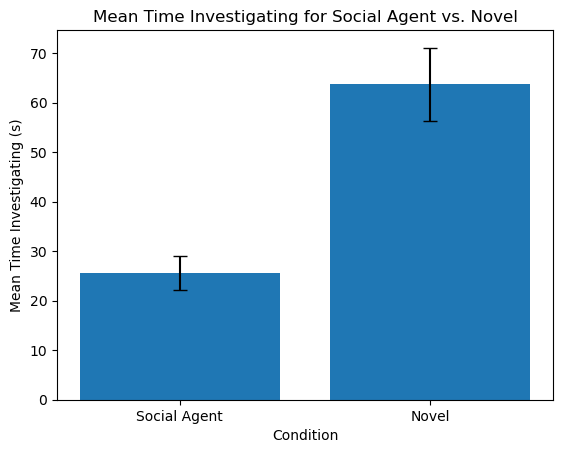

In [70]:
import matplotlib.pyplot as plt

# Extract data for social agent and novel conditions
social_agent_data = df['Social Agent']
novel_data = df['Novel']

# Calculate mean and SEM for social agent and novel
mean_social_agent = social_agent_data.mean()
mean_novel = novel_data.mean()

sem_social_agent = social_agent_data.sem()
sem_novel = novel_data.sem()

# Create labels and positions for the bar plot
labels = ['Social Agent', 'Novel']
x = range(len(labels))

# Create bar plot with error bars
plt.bar(x, [mean_social_agent, mean_novel], yerr=[sem_social_agent, sem_novel], capsize=5)

# Add labels and title
plt.xlabel('Condition')
plt.ylabel('Mean Time Investigating (s)')
plt.title('Mean Time Investigating for Social Agent vs. Novel')

# Add x-axis tick labels
plt.xticks(x, labels)

# Show plot
plt.show()
